In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn')
from mpl_toolkits import mplot3d

In [2]:
X_train = pd.read_csv('.\Downloads\Logistic_X_Train.csv')
Y_train = pd.read_csv('.\Downloads\Logistic_Y_Train.csv')

In [3]:
f1 = X_train[['f1']].values
f2 = X_train[['f2']].values
f3 = X_train[['f3']].values
x = f1
x = np.hstack((f1,f2))
x = np.hstack((x,f3))
print(x.shape)
f1 = f1.reshape((-1,))
f2 = f2.reshape((-1,))
f3 = f3.reshape((-1,))
y = Y_train[['label']].values
y = y.reshape((-1))

(3000, 3)


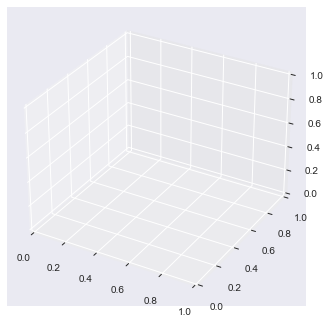

In [4]:
fig = plt.figure()
ax = plt.axes(projection="3d")
plt.show()

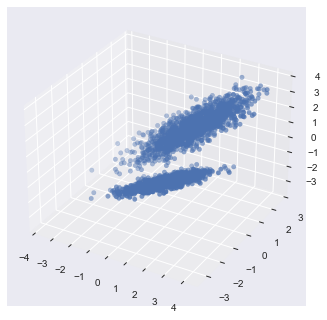

In [5]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(f2,f3,f1,  cmap='hsv')
plt.show()

In [19]:
def hypothesis(x,w,b):
    hx = np.dot(x,w)+b
    return sigmoid(hx)

In [20]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-1.0*x))

In [21]:
def error(x,y,w,b):
    err = 0.0
    m = x.shape[0]
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        err+=(y[i]*np.log2(hx) + (1-y[i])*np.log2(1-hx))
    return err/m

In [22]:
def gradient(x,y,w,b):
    grad_b = 0.0
    grad_w = np.zeros(w.shape)
    m = x.shape[0]
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        grad_b+=(y[i]-hx)
        grad_w+=((y[i]-hx)*x[i])
    grad_b/=m
    grad_w/=m
    return [grad_w,grad_b]

In [23]:
def gradient_descent(x,y,w,b,learning_rate = 0.01):
    err = error(x,y,w,b)
    [grad_w,grad_b] = gradient(x,y,w,b)
    w += learning_rate*grad_w
    b += learning_rate*grad_b
    return err,w,b

In [24]:
def predict(x,w,b):
    confidence = hypothesis(x,w,b)
    if(confidence > 0.5):
        return 1
    else:
        return 0

In [25]:
def get_acc(x_test,y_test,w,b):
    pred = []
    m = y_test.shape[0]
    for i in range(m):
        p = predict(x_test[i],w,b)
        pred.append(p)
    pred = np.array(pred)
    return float(((pred == y_test).sum())/m)

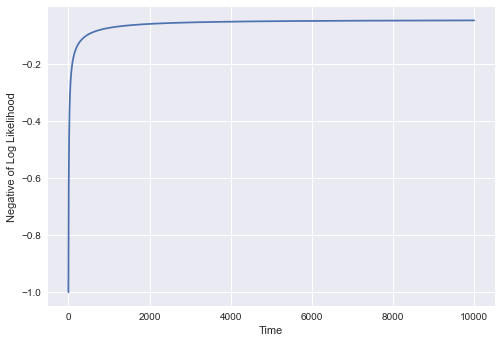

In [26]:
loss = []
acc = []
W = np.zeros((x.shape[1],))
b = 0
#W.shape
for i in range(10000):
    l,W,b = gradient_descent(x,y,W,b,learning_rate = 0.1)
    loss.append(l)
    #acc.append(gte_acc())
    
plt.plot(loss)
plt.ylabel("Negative of Log Likelihood")
plt.xlabel("Time")
plt.show()

SyntaxError: EOL while scanning string literal (<ipython-input-17-bfdec1e74e46>, line 2)

In [27]:
X_test = pd.read_csv('.\Downloads\Logistic_X_Test.csv')

In [28]:
f1_test = X_test[['f1']].values
f2_test = X_test[['f2']].values
f3_test = X_test[['f3']].values
f1_test = f1_test.reshape((-1,))
f2_test = f2_test.reshape((-1,))
f3_test = f3_test.reshape((-1,))

In [29]:
f1

array([-1.23937466, -1.03607028, -0.61557914, ...,  0.08827657,
        1.52515501, -0.97981744])

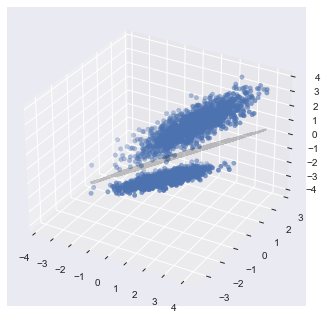

In [37]:
#Trainging Data\n",
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(f2,f3,f1,  cmap='hsv')
#plt.show()\n"
xt = f2
yt = f3
zt = -((W[1]*xt + W[2]*yt + b)/W[0])
ax.plot3D(xt,yt,zt,color = 'black',alpha = 0.2)
plt.show()

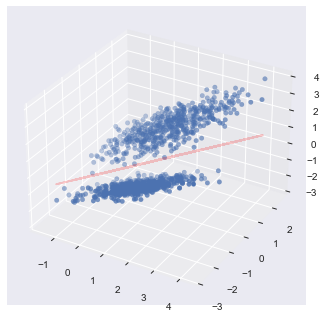

In [38]:
 #Testing Data
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(f2_test,f3_test,f1_test,  cmap='hsv')
#plt.show()\n"
xt = f2_test
yt = f3_test
zt = (-(W[1]*xt + W[2]*yt + b)/W[0])
ax.plot3D(xt,yt,zt,color = 'red',alpha = 0.2)
plt.show()

In [35]:
W

array([-3.9071653 ,  3.1072609 , -2.36873808])